<a href="https://colab.research.google.com/github/jialraro/AnalisisDatos/blob/main/Telecomx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Realizar la solicitud a la API
response = requests.get(url)

# Validar que la respuesta sea exitosa
if response.status_code == 200:
    data = response.json()
    print("Datos cargados correctamente")
else:
    print(f" Error al cargar datos. Código: {response.status_code}")


Datos cargados correctamente


In [2]:
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Ver las columnas disponibles
print(df.columns)

# Información general
df.info()

# Descripción estadística
df.describe()

# Verificar valores nulos
df.isnull().sum()


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   i

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [8]:
# Eliminar filas con datos nulos
df_clean = df.dropna()

# O rellenar valores nulos
df.fillna("Sin dato", inplace=True)

# Número total de clientes
print(f"Total clients: {df.shape[0]}")

# Distribución por género (usa el nombre correcto)
print(df['customer.gender'].value_counts())

# Estado de evasión (respetando mayúsculas)
print(df['Churn'].value_counts())



Total clients: 7267
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


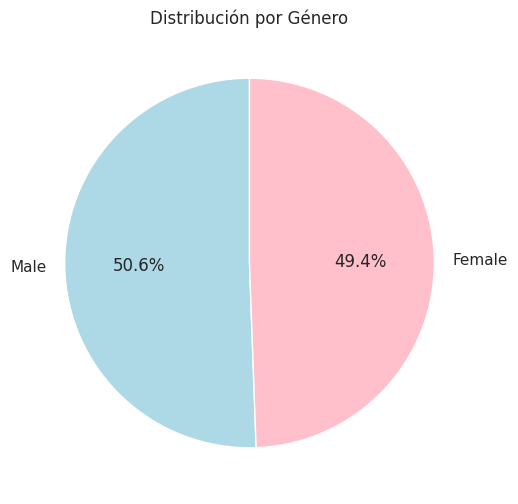

/tmp/ipython-input-3312467766.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel')


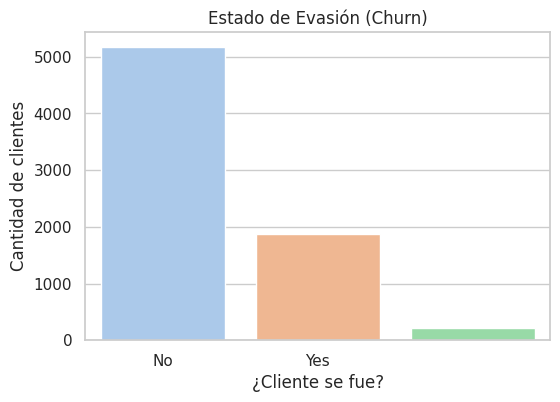

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito para los gráficos
sns.set(style="whitegrid")


# Conteo de género
gender_counts = df['customer.gender'].value_counts()

# Gráfico
plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Distribución por Género')
plt.ylabel('')
plt.show()
# Conteo de evasión
churn_counts = df['Churn'].value_counts()

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='pastel')
plt.title('Estado de Evasión (Churn)')
plt.xlabel('¿Cliente se fue?')
plt.ylabel('Cantidad de clientes')
plt.show()


In [12]:
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()



,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [13]:
# Solo columnas numéricas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
customer.tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
account.Charges.Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [14]:
# Usamos la columna de facturación diaria
col = 'Cuentas_Diarias'

print(f"Media: {df[col].mean():.2f}")
print(f"Mediana: {df[col].median():.2f}")
print(f"Desviación estándar: {df[col].std():.2f}")
print(f"Mínimo: {df[col].min():.2f}")
print(f"Máximo: {df[col].max():.2f}")
print(f"Rango intercuartílico (IQR): {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")


Media: 2.16
Mediana: 2.34
Desviación estándar: 1.00
Mínimo: 0.61
Máximo: 3.96
Rango intercuartílico (IQR): 1.82


In [15]:
# Estado de evasión
print(df['Churn'].value_counts(normalize=True) * 100)

# Género
print(df['customer.gender'].value_counts(normalize=True) * 100)

# Método de pago
print(df['account.PaymentMethod'].value_counts(normalize=True) * 100)


Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64
customer.gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64
account.PaymentMethod
Electronic check             33.645246
Mailed check                 22.911793
Bank transfer (automatic)    21.865969
Credit card (automatic)      21.576992
Name: proportion, dtype: float64


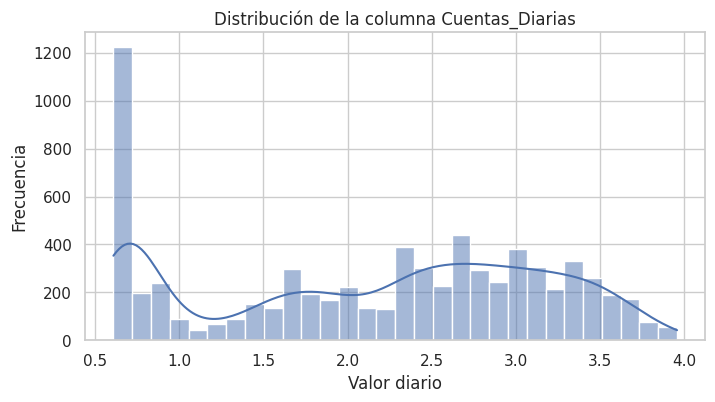

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['Cuentas_Diarias'], bins=30, kde=True)
plt.title("Distribución de la columna Cuentas_Diarias")
plt.xlabel("Valor diario")
plt.ylabel("Frecuencia")
plt.show()
